# Exploratory Data Analysis on Peer to Peer Lending

The following Exploratory analysis has been done on a dataset provided by The Lending Club which was one of the first companies to have started Peer to Peer Lending. P2P lending websites provide a platform that directly connects borrowers to investors. For lenders, P2P lending is a way to generate income on their cash at a rate that exceeds those offered by conventional savings accounts.  The loan applicant posts a financial profile that is assigned a risk category that determines the interest rate the applicant will pay. Most P2P lending sites have a wide range of interest rates based on the creditworthiness of the applicant. The rates for applicants with good credit are often lower than comparable bank rates, while rates for applicants with sketchy credit records may go much higher. However, the default rates of P2P lending make it an interesting case to study and ponder whether the returns are worth the risk.

In [1]:
project_name = "Exploratory Data Analysis on Peer to Peer Loans" 

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation and Cleaning

The original dataset contained more than 60,000 rows and 60 columns. The data was read from a csv file,unnecessary and irrelevant columns were dropped , by storing the selected columns in a list and performing the

new_dataframe = original_dataframe[selected_columns].copy() operation

The rows were cleaned using 

pandas.dataframe.dropna(axis = 0 , how = 'any') 

so that any row having a Nan value for any of the selected columns, gets dropped.This dataframe was then written into the loans_data.csv. The dataframe still has 2000 rows. To reduce the number of rows , we'll use dataframe.sample(n=1000) to get a random dataframe of 1000 entries and store it in the loans_final_df dataframe.

In [3]:
loans_df = pd.read_csv('../input/p2p-loans/loans_data.csv')

In [4]:
loans_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.117722e+08,14081.875000,14081.875000,14081.875000,12.907535,418.643960,79065.718510
std,5.458429e+05,9460.786951,9460.786951,9460.786951,4.819471,276.416727,54326.677582
min,1.069363e+08,1000.000000,1000.000000,1000.000000,5.320000,30.910000,0.000000
25%,1.116810e+08,6493.750000,6493.750000,6493.750000,9.930000,215.847500,45000.000000
50%,1.119288e+08,12000.000000,12000.000000,12000.000000,11.990000,339.790000,65100.000000
75%,1.120757e+08,20000.000000,20000.000000,20000.000000,15.050000,563.810000,96000.000000
max,1.124413e+08,40000.000000,40000.000000,40000.000000,30.890000,1566.800000,680000.000000


Since the data does not contain any invalid entries or entries that are not realistically feasible , to get a smaller dataframe, we simply use random entries generated by the sample function

In [5]:
loans_final_df = loans_df.sample(n=1000)

In [6]:
loans_final_df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
pymnt_plan              object
purpose                 object
dtype: object

In [7]:
loans_final_df.loc[loans_final_df['term']=='36 months','term']=36
loans_final_df.loc[loans_final_df['term']=='60 months', 'term']=60 

In [8]:
loans_final_df['term']=pd.to_numeric(loans_final_df.term)

In [9]:
loans_final_df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
pymnt_plan              object
purpose                 object
dtype: object

The datatype of values stored in under the column 'term' is now int.

To change the datatype of emp_length, we'll have to assign integer values to the strings first, then they can be changed into numeric datatype.

In [10]:
loans_final_df.emp_length.unique()

array(['2 years', '10+ years', '3 years', '6 years', '< 1 year', nan,
       '1 year', '4 years', '5 years', '9 years', '8 years', '7 years'],
      dtype=object)

In [11]:
loans_final_df.loc[loans_final_df['emp_length']=='10+ years','emp_length']=10
loans_final_df.loc[loans_final_df['emp_length']=='3 years','emp_length']=3
loans_final_df.loc[loans_final_df['emp_length']=='2 years','emp_length']=2
loans_final_df.loc[loans_final_df['emp_length']=='< 1 year','emp_length']=0
loans_final_df.loc[loans_final_df['emp_length']=='1 year','emp_length']=1
loans_final_df.loc[loans_final_df['emp_length']=='4 years','emp_length']=4
loans_final_df.loc[loans_final_df['emp_length']=='5 years','emp_length']=5
loans_final_df.loc[loans_final_df['emp_length']=='6 years','emp_length']=6
loans_final_df.loc[loans_final_df['emp_length']=='7 years','emp_length']=7
loans_final_df.loc[loans_final_df['emp_length']=='9 years','emp_length']=9
loans_final_df.loc[loans_final_df['emp_length']=='8 years','emp_length']=8
loans_final_df.emp_length.unique()

array([2, 10, 3, 6, 0, nan, 1, 4, 5, 9, 8, 7], dtype=object)

In [12]:
loans_final_df['emp_length']=pd.to_numeric(loans_final_df.emp_length)
loans_final_df.emp_length.dtype

dtype('float64')

In [13]:
loans_final_df.sample(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose
1659,111053104,32000,32000,32000.0,60,15.05,762.12,C,C4,Correctional Counselor,9.0,MORTGAGE,135000.0,Source Verified,Current,n,debt_consolidation
1269,111888349,40000,40000,40000.0,60,16.02,973.15,C,C5,Teacher,10.0,MORTGAGE,103803.0,Verified,Current,n,debt_consolidation
581,110611463,14000,14000,14000.0,60,13.59,322.79,C,C2,Analyst,0.0,MORTGAGE,95000.0,Source Verified,Current,n,debt_consolidation
620,112034269,14000,14000,14000.0,36,12.62,469.16,C,C1,Software Engineer I,2.0,RENT,70000.0,Not Verified,Current,n,credit_card
1765,110548352,35000,35000,35000.0,60,19.03,908.50,D,D3,Registered Nurse,10.0,MORTGAGE,81000.0,Verified,Current,n,debt_consolidation
1664,111760437,2500,2500,2500.0,36,12.62,83.78,C,C1,Dock Worker,0.0,RENT,35000.0,Verified,Current,n,other
1124,112020456,14000,14000,14000.0,36,21.45,530.70,D,D5,Escrow Assistant,2.0,RENT,45000.0,Not Verified,Fully Paid,n,debt_consolidation
555,110887979,26875,26875,26875.0,36,29.69,1136.33,F,F2,Court officer,10.0,MORTGAGE,109000.0,Source Verified,Current,n,debt_consolidation
1548,112021434,7500,7500,7500.0,36,10.42,243.49,B,B3,NaN,NaN,MORTGAGE,50131.0,Verified,Current,n,credit_card
982,111837085,6600,6600,6600.0,36,13.59,224.27,C,C2,Sheet Metal Worker,6.0,OWN,70000.0,Source Verified,Current,n,debt_consolidation


## Exploratory Analysis and Visualization


### Distribution of Amount of Loan

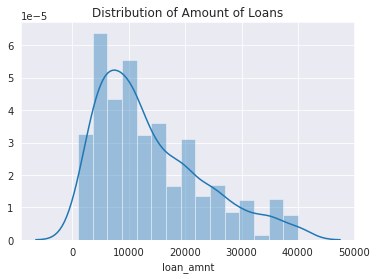

In [14]:
sns.set_style("darkgrid")
plt.title("Distribution of Amount of Loans")
sns.distplot(loans_final_df.loan_amnt);

The peak of the graph can be seen at $ 10,000 , after which the curve falls gradually , which suggests that less number of investors chose to invest large amounts and the bulk of the loans given were small - midranged.

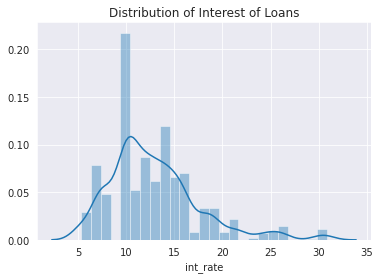

In [15]:
plt.title("Distribution of Interest of Loans")
sns.distplot(loans_final_df.int_rate);

## Grade of Borrower Determines Interest Rate of the Loan

In [16]:
interest_df = loans_final_df.groupby('grade')[['int_rate']].mean()

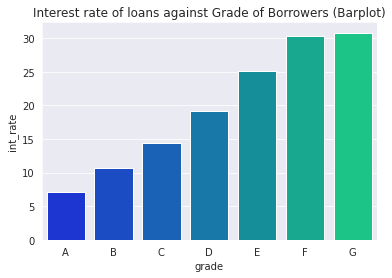

In [17]:
plt.title('Interest rate of loans against Grade of Borrowers (Barplot)')
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(interest_df.index,interest_df.int_rate,palette='winter');

### Well defined Grade clusters give a deeper insight

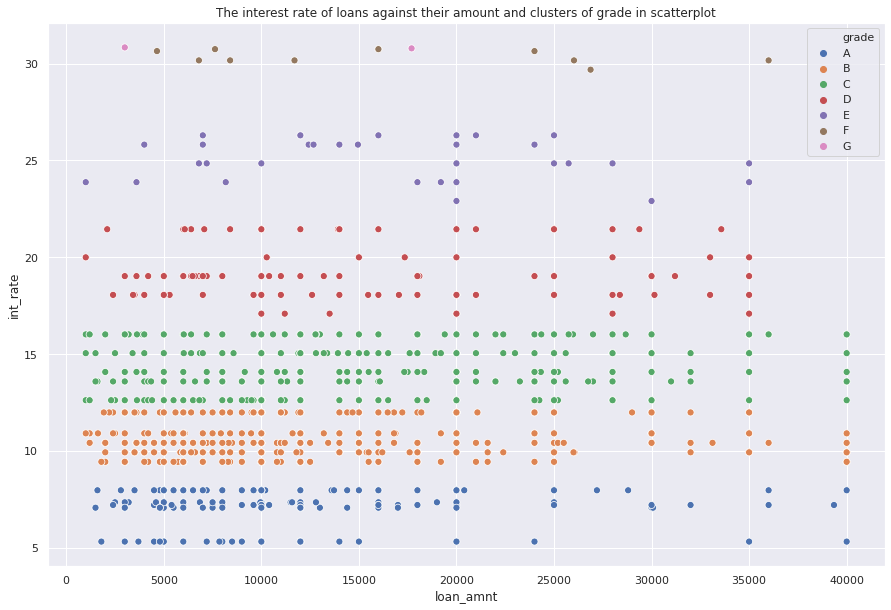

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
plt.title('The interest rate of loans against their amount and clusters of grade in scatterplot')
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(x=loans_final_df.loan_amnt,
                y=loans_final_df.int_rate,
                hue=loans_final_df.grade,
                hue_order=['A','B','C','D','E','F','G'],
                legend="full",
                s=50);

Although the barplot clearly implies the increasing trend of interest rates as we go from grade A to G , the Scatterplot provides a deeper insight into the same, by highlighting that borrowers of each grade restricted themselves to getting a loan within certain bounds , since clusters with well defined bounds were observed.

### Employment Period

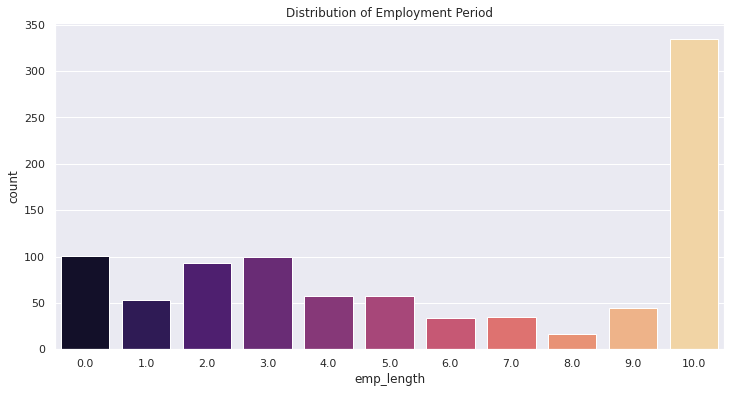

In [19]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Employment Period')
sns.countplot(loans_final_df.emp_length , palette = 'magma');

## Asking and Answering Questions

### Which grade of borrowers were the investors most intersted in investing into ?

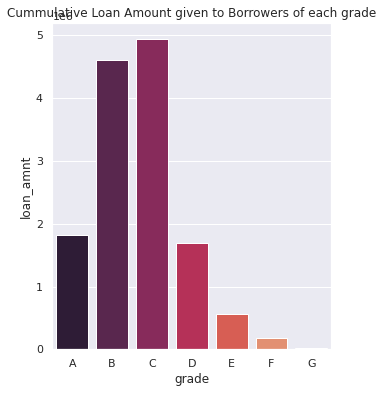

In [20]:
sns.set(rc={'figure.figsize':(5,6)})
grade_df = loans_final_df.groupby('grade')[['loan_amnt']].sum()
grade_df['grade'] = ['A','B','C','D','E','F','G']
plt.title('Cummulative Loan Amount given to Borrowers of each grade')
sns.barplot(grade_df.grade,grade_df.loan_amnt, palette ='rocket' )

<b>Grade A</b> did <b>not</b> receive the most loans, even though they had the <b>most promising financial profile and were the least likely to default.</b>

<b>Grade G</b> did <b>not</b> receive the most loans either even though <b>grade G borrowers promised to pay the highest interest rates and give the maximum returns on the investment.</b>

<b>We see that Grades B and Grade C borrowers were the favourites among investors since they offered an optimum balance between the risk and returns.</b>

### What was the loan distribution pattern with respect to the paygrade of borrowers , the loan amount and the periodic installment ?

In [21]:
#Grouping the continuous values of annual income into categories so that meaningful conclusions
#can be drawn based on the paygrade
bins = np.array([5000,7500,10000,15000,25000,50000,75000,100000,500000])
annual_income = np.digitize(loans_final_df.annual_inc,bins)

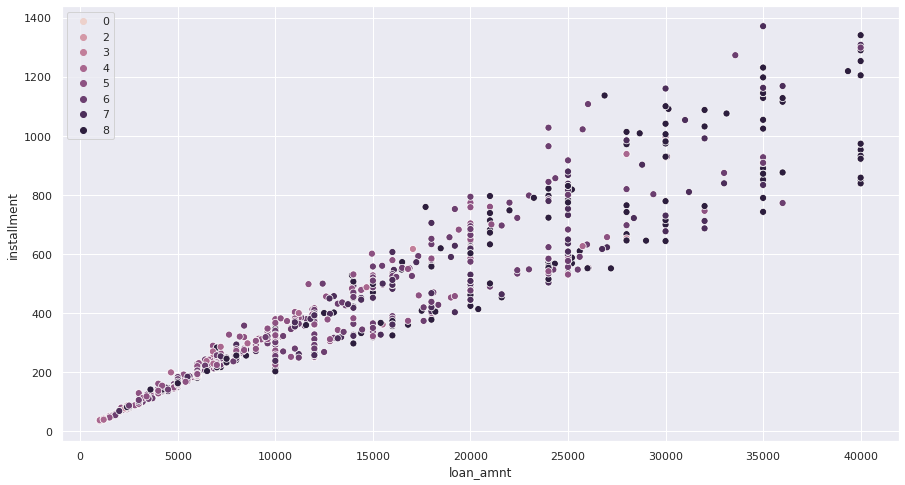

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(x=loans_final_df.loan_amnt,
                y=loans_final_df.installment,
                hue=annual_income,
                legend="full",
                s=50);

<b>Darker dots represent the borrowers belonging to the high paygrade frame and the lighter dots represent the borrowers belonging to lower paygrade frame.</b>

It is quite obvious that the loan amount and installment follow a linear trend(for both 3/5 years).

Darker clusters are formed away from the origin which implies that borrowers with higher annual income were interested in getting larger loans with greater installment, and the lighter dots are clustered near origin which implies that people with lower annual income chose to get smaller loans having lesser installment.

### What were the most common purposes for which the borrowers applied for loans? 

In [23]:
loans_final_df.groupby('purpose')['purpose'].count()

purpose
car                    11
credit_card           185
debt_consolidation    576
home_improvement       90
house                   3
major_purchase         30
medical                17
moving                 13
other                  56
renewable_energy        2
small_business          5
vacation               12
Name: purpose, dtype: int64

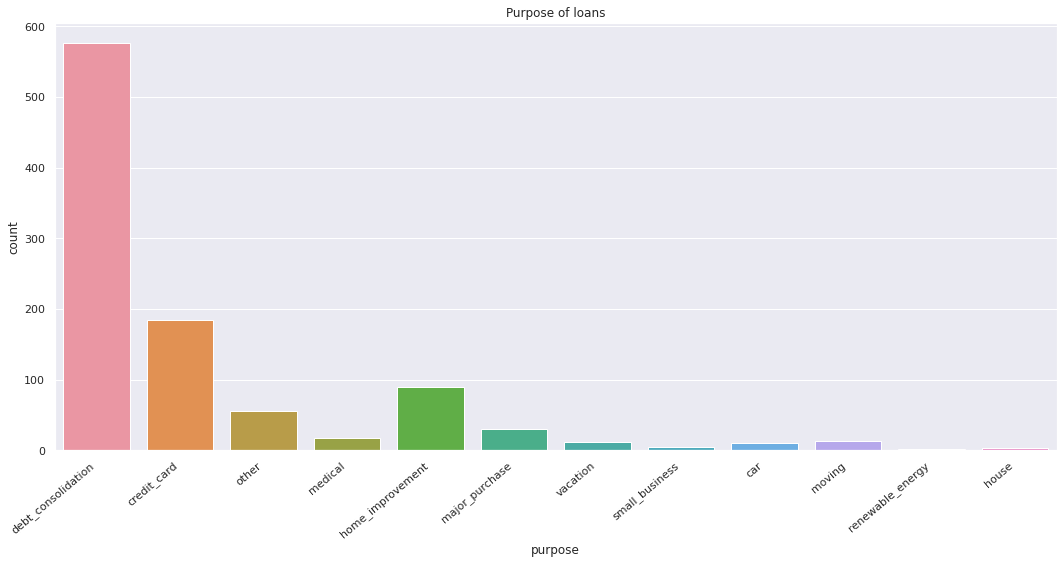

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Purpose of loans')
ax = sns.countplot(loans_final_df.purpose)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

A large portion of the loans were borrowed to consolidate previous debts and credit card dues.

### Is there a relation Between Purpose of Loan and the Interest Rate ?

In [25]:
major_purposes=['debt_consolidation','credit_card','home_improvement','medical','vacation','major_purchase']
purpose_major_df = loans_final_df[loans_final_df['purpose'].isin(major_purposes)] 
purpose_major = purpose_major_df[['purpose','int_rate']]
purpose_major

,purpose,int_rate
673,debt_consolidation,10.91
1884,debt_consolidation,15.05
590,credit_card,11.99
878,credit_card,9.93
1506,debt_consolidation,10.42
...,...,...
35,major_purchase,16.02
1942,debt_consolidation,9.44
1971,debt_consolidation,14.08
1886,debt_consolidation,13.59


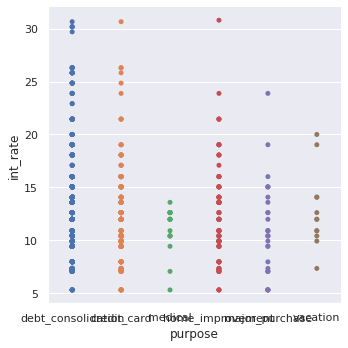

In [26]:
sns.catplot(x="purpose", y="int_rate", jitter=False, data=purpose_major);

The borrowers agreed to pay higher rates of interest when they needed cash for debt consolidation, improvement and to pay off credit card dues. However they were reluctant to pay higher rates when they needed the money for major purchases, medical reasons or for funding their vacations.

### What is the status of loans that were approved during the observed period, and does it affect the duration for which investors were willing to lend money ?

In [27]:
loan_status = loans_final_df.groupby('loan_status')['loan_status'].count()
loan_status

loan_status
Charged Off             5
Current               919
Fully Paid             57
Late (16-30 days)       3
Late (31-120 days)     16
Name: loan_status, dtype: int64

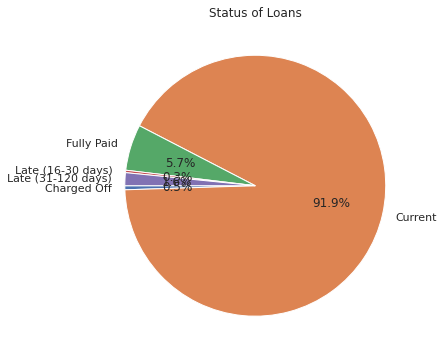

In [28]:
plt.figure(figsize=(12,6))
plt.title('Status of Loans')
plt.pie(loan_status, autopct='%1.1f%%',labels=loan_status.index ,startangle=180);

A large fraction of the loans belong to the current state and a very small percentage (less than 5% ) had been fully paid which implies that the other loans might go into bad debts/delayed returns or the investments haven't matured yet.

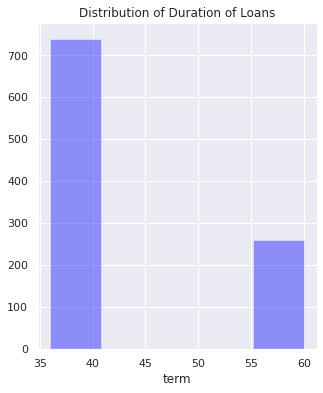

In [29]:
sns.set(rc={'figure.figsize':(5,6)})
plt.title("Distribution of Duration of Loans")
sns.distplot(loans_final_df.term, kde = False, color='blue');

Most investors chose to give out loans for a period of 3 years instead of 5 years.

This observation is backed by the fact that resources invested in peer to peer lending are no longer liquid and cannot be withdrawn (without incurring losses) from the market before the specified period. Thus they choose to invest in short duration loans, so as to avoid getting stuck in the long maturity period as shown by the piechart.

## Inferences and Conclusion

A lot of interesting inferences have been drawn from the analysis, here's a summary of a few of them:

* A lot of borrowers applied for P2P loans to clear their existing debts and credit card dues, which would otherwise incur extraordinary due charges.
* The investors opt to lend their money to borrowers who offer a combination of lesser risk and greater return (i.e borrowers belonging to Grade B and C)
* Shorter Duration Loans are more popular among investors.
* A lot of the borrowers who got loans, had been employed for a long time (>10 years).
* The purpose of the loan also influences the rate of interest that the borrower would be willing to pay.
* Most of the loans had an interest rate of around 10% (or greater),this can be because the borrowers having good financial profiles can get loans from banks at a lower interest rate and might not have to turn to P2P loans to raise money.

## Limitations

The dataset used for the above analysis consisted of data that was released by the Lending Club, so the factor of Selection Bias cannot be ignored. The data was more inclined towards loans that were paid off in time , and the default rate of the loans calculated by the above dataset was far lower than what other sources predict. Hence analyzing the factors that influence whether or not a loan would be defaulted, has been avoided, since it would give inaccurate inferences and insights. The bias is probably to make peer to peer lending seem more lucrative and rewarding , while eliminating the risk involved as compared to traditional investment options.

## References and Future Work

* Choose a different set of columns to analyze other facets of the data
* Prepare an analysis focusing on defaulted loans and determine which of the factors among loan amount , interest rate, annual income, installment or the grade of the borrower is the most important factor in loans being defaulted
* Compare the results of this year's data with the other years and identify interesting trends
* Compare the results of this data with the other investment opportunities for the same amount frame to compare opportunity cost.

* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* The Lending Club Dataset: https://www.lendingclub.com/info/download-data.action